## Bounce Rate: Case Study
- Bounce rate is a crucial metric in web analytics that measures the percentage of visitors who land on a website and leave without engaging in any further interactions. It indicates the effectiveness of a website in capturing and retaining the attention of its visitors.

- Given a dataset containing information about the bounce rate, session duration, and other features of website users, the goal is to analyze the bounce rate and its relationship with session duration.

Your task is to gain insights into user engagement and identify factors that contribute to a high or low bounce rate. Find answers to questions such as:

1. What is the overall bounce rate of the website? 
2. Are there any specific patterns or trends in the relationship between bounce rate and session duration? 
3. Can we identify segments of users with different bounce rate behaviours?

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

In [2]:
data = pd.read_csv('bounce-rate.csv')
data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,00:01:35,87.19%
1,1.583822e+09,260,00:01:04,29.62%
2,1.030699e+09,237,00:00:02,99.16%
3,1.025030e+09,226,00:02:22,25.66%
4,1.469968e+09,216,00:01:23,46.76%


- Before moving further let's check if there are any null vlaues in the data

In [3]:
data.isnull().sum()

Client ID                0
Sessions                 0
Avg. Session Duration    0
Bounce Rate              0
dtype: int64

- As we can see above there are no any null values in the data

- Now, let's have a look about each columns information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Client ID              999 non-null    float64
 1   Sessions               999 non-null    int64  
 2   Avg. Session Duration  999 non-null    object 
 3   Bounce Rate            999 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.3+ KB


- The Avg. Session Duration and Bounce Rate columns are not numerical. We need to convert them into appropriate data types for this task. Here’s how we can prepare our data

In [5]:
# Convert the 'Avg. Session Duration' column
data['Avg. Session Duration'] = data['Avg. Session Duration'].str[1:]
data['Avg. Session Duration'] = pd.to_timedelta(data['Avg. Session Duration'])
data['Avg. Session Duration'] = data['Avg. Session Duration'] / pd.Timedelta(minutes=1)

# Convert the 'Bounce Rate' column
data['Bounce Rate'] = data['Bounce Rate'].str.rstrip('%%').astype('float')

data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
0,5.778476e+08,367,1.583333,87.19
1,1.583822e+09,260,1.066667,29.62
2,1.030699e+09,237,0.033333,99.16
3,1.025030e+09,226,2.366667,25.66
4,1.469968e+09,216,1.383333,46.76


- In the above code, we removed the first character from each value in the “Avg. Session Duration” column, representing a unit of time. Then, we converted the values in the “Avg. Session Duration” column to a standardized time delta format, representing time durations. Then, we further converted the time delta values to minutes, providing the average session duration in a numeric format. Similarly, we removed the percentage sign from each value in the “Bounce Rate” column and converted them to float values, representing the bounce rate as decimals.

- Now, let's have a look at the descriptive statistics of the data

In [6]:
data.describe()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate
count,9.990000e+02,999.000000,999.000000,999.000000
mean,1.036401e+09,32.259259,3.636520,65.307978
std,6.151503e+08,24.658588,4.040562,22.997270
min,1.849182e+05,17.000000,0.000000,4.880000
25%,4.801824e+08,21.000000,0.891667,47.370000
50%,1.029507e+09,25.000000,2.466667,66.670000
75%,1.587982e+09,35.000000,4.816667,85.190000
max,2.063338e+09,367.000000,30.666667,100.000000


- Now let's have a look at the correlation matrix before moving forward

In [7]:
# Exclude 'Client_Id' column from the dataset
data_without_id = data.drop('Client ID', axis=1)

# Calculate the correlation matrix
correlation_matrix = data_without_id.corr()

# Visulaize the correlation matrix
correlation_fig = px.imshow(correlation_matrix, labels=dict(x='Features', y='Features', color='Correlation'))
correlation_fig.update_layout(title='Correlation Matrix')
correlation_fig.show()

pio.write_image(correlation_fig, './images/image1.png')


 ![Plot Description](./images/image1.png)

- We can also use matplotlib and seaborn to visualize the correaltion matrix

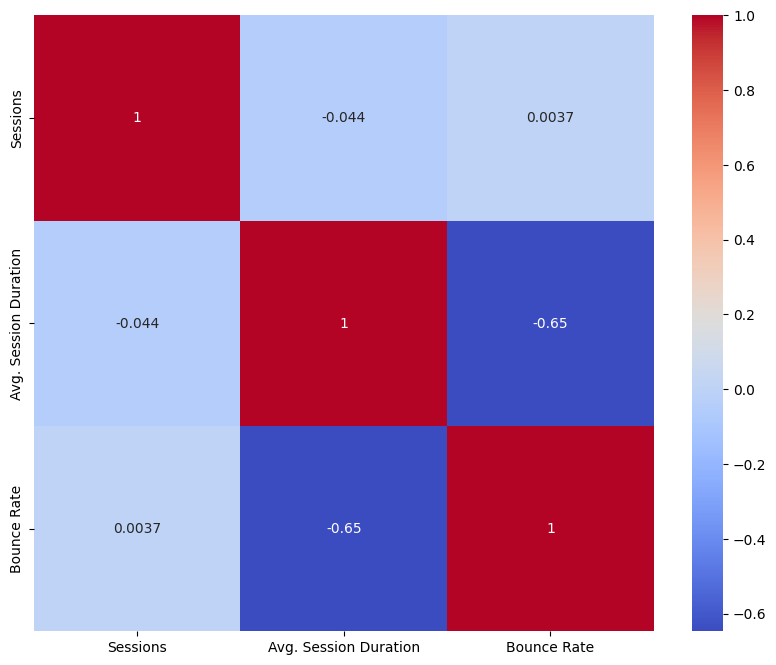

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# Step 1: Calculate the correlation matrix

# Step 2: Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8)) # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

### Analyzing Bounce Rates
- Let’s analyze the bounce rate of users to understand user engagement. Bounce rate refers to the percentage of users who visit a website or webpage but leave without taking any further action or navigating to other pages within the same site. In simple terms, it measures the rate at which visitors bounce away from a website. 

- Now, let's analyze the bounce rate of the users

In [9]:
# Define the threshold for high, medium, and low bounce rate
high_bounce_rate_thtreshold = 70
low_bounce_rate_threshold = 30

# Segment the clients based on bounce rates
data['Bounce Rate Segment'] = pd.cut(data['Bounce Rate'], bins=[0, low_bounce_rate_threshold, high_bounce_rate_thtreshold, 100], labels=['Low', 'Medium', 'High'], right=False)

# Count the number of clients in each segment
segment_counts = data['Bounce Rate Segment'].value_counts().sort_index()

# Visualize the segments
segment_fig = px.bar(segment_counts, labels={'index': 'Bounce Rate Segment', 'value': 'Number of Clients'}, title='Segmentation of Clients based on Bounce Rates')
print(segment_counts.head())
segment_fig.show()

pio.write_image(segment_fig, './images/image2.png')

Bounce Rate Segment
Low        71
Medium    480
High      399
Name: count, dtype: int64


 ![Plot Description](./images/image2.png)

- Now let's have a look at the average session duration of the users in each bounce segment

In [12]:
# Calculate the average session duration for each segment
segment_avg_duration = data.groupby('Bounce Rate Segment')['Avg. Session Duration'].mean()

segment_avg_duration.head()

# Create a bar chart to compute user engagement
engagement_fig = go.Figure(data=go.Bar(x=segment_avg_duration.index, y=segment_avg_duration, text=segment_avg_duration.round(2), textposition='auto', marker=dict(color=['#2ECC40', '#FFDC00', '#FF4136'])))

engagement_fig.update_layout(title='Comparison of User Engagement byBounce Rate Segment', xaxis=dict(title='Bounce Rate Segment'), yaxis=dict(title='Average Session Duration (minutes)'))

engagement_fig.show()

pio.write_image(engagement_fig, './images/image3.png')

C:\Users\NM\AppData\Local\Temp\ipykernel_20096\4181596727.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



 ![Plot Description](./images/image3.png)

- So we can see that users with low bounce rates have an average session duration of about 9.05 minutes on the website, while users with high bounce rates have an average session duration of only 1.43 minutes.

- Now let's have a look at the top 10 loyal users according to the number of sessions and average session duration

In [13]:
# Calculate the total session duration for each client
data['Total Session Duration'] = data['Sessions'] * data['Avg. Session Duration']

# Sort the DataFrame bby the total session duration in descending order
df_sorted = data.sort_values('Total Session Duration', ascending=False)

# The top 10 most loyal users
df_sorted.head(10)

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration
20,1.884620e+09,93,30.666667,16.13,Low,2852.000000
54,1.041722e+09,67,20.500000,22.39,Low,1373.500000
262,8.756557e+08,34,29.966667,26.47,Low,1018.866667
10,1.461865e+09,117,8.450000,48.72,Medium,988.650000
173,1.849182e+05,40,24.416667,17.50,Low,976.666667
15,1.049234e+09,99,9.716667,34.34,Medium,961.950000
310,2.026953e+09,31,22.116667,35.48,Medium,685.616667
24,1.903206e+09,90,7.016667,36.67,Medium,631.500000
211,2.054569e+09,37,16.250000,35.14,Medium,601.250000
402,6.220935e+08,28,21.300000,39.29,Medium,596.400000


- Now let's have a look at the relationship between the average session duration and the bounce rates

In [17]:
# Create a scatter plot to analyze the relationship between bounce rate and avg session
scatter_fig = px.scatter(data, x='Bounce Rate', y='Avg. Session Duration', title='Relationship between Bounce Rate and Avg. Session Duration', trendline='ols')

scatter_fig.update_layout(xaxis=dict(title='Bounce Rate'), yaxis=dict(title='Avg. Session Duration'))

scatter_fig.show()

pio.write_image(scatter_fig, './images/image4.png')

 ![Plot Description](./images/image4.png)

### Observation
- There is a negative linear relationship between the average session duration and bounce rates (which is ideal here). It means a high number of average session duration results in lower bounce rates.

## Analyzing User Retention
- Retained users are those individuals who continue to use or engage with a product, service, or platform over a specific period of time. They are users who return and remain active or loyal to the offering after their initial interaction or sign-up.

- Retained users demonstrate ongoing engagement, repeated usage, or continued interactions with the offering, indicating a level of satisfaction or value derived from the product or service.

-  Businesses often focus on retaining users to drive growth, improve customer loyalty, and achieve sustainable success in the market.

- Here is how we can create retention segments based on the number of sessions

In [20]:
# Define the retention segemnts based on the number of sessions
def get_retention_segment(row):
  if row['Sessions'] >= 32: # 32 is mean of sessions
    return 'Frequent Users'
  else:
    return 'Occasional Users'
  
# Create a new column for retention segments
data['Retention Segment'] = data.apply(get_retention_segment, axis=1)

data.head()

,Client ID,Sessions,Avg. Session Duration,Bounce Rate,Bounce Rate Segment,Total Session Duration,Retention Segment
0,5.778476e+08,367,1.583333,87.19,High,581.083333,Frequent Users
1,1.583822e+09,260,1.066667,29.62,Low,277.333333,Frequent Users
2,1.030699e+09,237,0.033333,99.16,High,7.900000,Frequent Users
3,1.025030e+09,226,2.366667,25.66,Low,534.866667,Frequent Users
4,1.469968e+09,216,1.383333,46.76,Medium,298.800000,Frequent Users


- The above function takes a row of data as input. It assigns a retention segment based on the number of sessions for each row. If the number of sessions is greater than or equal to 32 (which is the mean of sessions), the function returns ‘Frequent Users’. Otherwise, it returns ‘Occasional Users’.

- Now let's have a look at the averaage bounce rate by retention segment

In [21]:
# Calculate the average bounce rate for each retention segment
segment_bounce_rates = data.groupby('Retention Segment')['Bounce Rate'].mean().reset_index()

# Create a bar chart to visulaize the average bounce rates by retention segment
bar_fig = px.bar(segment_bounce_rates, x='Retention Segment', y='Bounce Rate',title='Average Bounce Rate by Retention Segment', labels={'Retention Segent': 'Retention Segment', 'Bounce Rate': 'Average Bounce Rate'})

bar_fig.show()

pio.write_image(bar_fig, './images/image5.png')

 ![Plot Description](./images/image5.png)

### Observation
- There’s not much difference between the average bounce rates of frequent and occasional users.